<a href="https://colab.research.google.com/github/Daramluv/Google_colab/blob/main/Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19861 sha256=86a30b069bd320d8443907dc2e098c385770eb198997f66ef24774e4a9bc7ef7
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [ ]:
from vecstack import stacking
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


#from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from collections import Counter #for Smote,

import warnings
warnings.filterwarnings("ignore")

In [ ]:
trainfile =r"/content/RevisedHomesiteTrain1.csv"
train_data = pd.read_csv(trainfile)
print(train_data.shape)
print(train_data.head(5))

(65000, 596)
   CoverageField11A  CoverageField11B  CoverageField1A  CoverageField1B  \
0                 2                 1               17               23   
1                 5                 9                6                8   
2                 4                 6                7               12   
3                15                23                3                2   
4                 4                 6                8               13   

   CoverageField2A  CoverageField2B  CoverageField3A  CoverageField3B  \
0               17               23               15               22   
1                6                8                5                7   
2                7               12                6               10   
3                3                2                2                2   
4                8               13                7               11   

   CoverageField4A  CoverageField4B  ...  PropertyField38_N  \
0               16               2

In [ ]:
testfile =r"/content/RevisedHomesiteTest1.csv"
test_data = pd.read_csv(testfile)

print(test_data.shape)
print(test_data.head())

(128827, 596)
   CoverageField11A  CoverageField11B  CoverageField1A  CoverageField1B  \
0                13                22                4                4   
1                 4                 5                8               14   
2                 3                 3               11               18   
3                 5                 9               14               22   
4                12                21                4                5   

   CoverageField2A  CoverageField2B  CoverageField3A  CoverageField3B  \
0                4                4                3                3   
1                8               14                7               12   
2               11               18               10               16   
3               15               22               13               20   
4                4                5                4                4   

   CoverageField4A  CoverageField4B  ...  PropertyField38_N  \
0                3               

In [ ]:
print(test_data.columns)

Index(['CoverageField11A', 'CoverageField11B', 'CoverageField1A',
       'CoverageField1B', 'CoverageField2A', 'CoverageField2B',
       'CoverageField3A', 'CoverageField3B', 'CoverageField4A',
       'CoverageField4B',
       ...
       'PropertyField38_N', 'PropertyField38_Y', 'GeographicField63_ ',
       'GeographicField63_N', 'GeographicField63_Y', 'GeographicField64_CA',
       'GeographicField64_IL', 'GeographicField64_NJ', 'GeographicField64_TX',
       'GeographicField64'],
      dtype='object', length=596)


In [ ]:
print(train_data.columns)

Index(['CoverageField11A', 'CoverageField11B', 'CoverageField1A',
       'CoverageField1B', 'CoverageField2A', 'CoverageField2B',
       'CoverageField3A', 'CoverageField3B', 'CoverageField4A',
       'CoverageField4B',
       ...
       'PropertyField38_N', 'PropertyField38_Y', 'GeographicField63_ ',
       'GeographicField63_N', 'GeographicField63_Y', 'GeographicField64_CA',
       'GeographicField64_IL', 'GeographicField64_NJ', 'GeographicField64_TX',
       'QuoteConversion_Flag'],
      dtype='object', length=596)


QuoteConversion_Flag
0    52738
1    12262
Name: count, dtype: int64
QuoteConversion_Flag
0    0.811354
1    0.188646
Name: proportion, dtype: float64


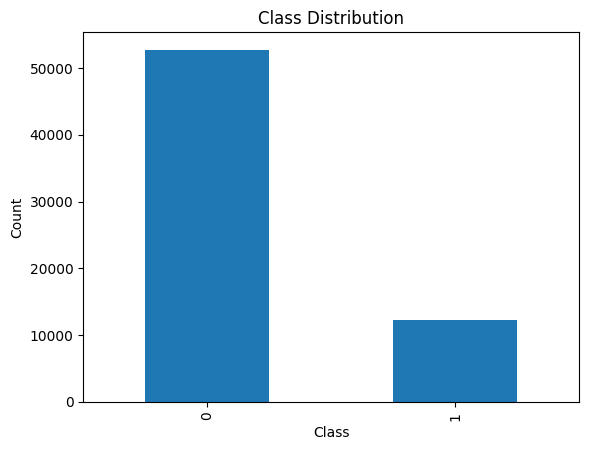

In [ ]:
# 'QuoteConversion_Flag'
print(train_data['QuoteConversion_Flag'].value_counts())
print(train_data['QuoteConversion_Flag'].value_counts(normalize=True))

# visualization
train_data['QuoteConversion_Flag'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
X_train = train_data.drop('QuoteConversion_Flag', axis=1)
y_train = train_data['QuoteConversion_Flag']

# Load test data
X_test = test_data
X_test1=X_test.iloc[:, :-1].copy()

In [ ]:
X = train_data.drop('QuoteConversion_Flag', axis=1)
y = train_data['QuoteConversion_Flag']

# X와 y가 동일한 크기인지 확인
print(X.shape, y.shape)

(65000, 595) (65000,)


In [ ]:
# Train-test split
X = train_data.drop('QuoteConversion_Flag', axis=1)
y = train_data['QuoteConversion_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Different SMOTE strategies
sampling_strategies = [0.4, 0.5, 0.6]
results = []

for strategy in sampling_strategies:
    print(f"===== SMOTE Sampling Strategy: {strategy} =====")

    # Apply SMOTE to training data only
    smote = SMOTE(sampling_strategy=strategy, random_state=42)
    X_res, y_res = smote.fit_resample(X_train, y_train)

    # Train model
    model = MLPClassifier(max_iter=200, random_state=42)
    model.fit(X_res, y_res)

    # Predict on original test data (unaltered by SMOTE)
    y_pred = model.predict(X_test)

    # Evaluate results
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Store results
    results.append({
        'Sampling Strategy': strategy,
        'Accuracy': accuracy
    })

# Display results
results_df = pd.DataFrame(results)
print(results_df)

===== SMOTE Sampling Strategy: 0.4 =====
Accuracy: 0.8396923076923077
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     15811
           1       0.70      0.26      0.38      3689

    accuracy                           0.84     19500
   macro avg       0.78      0.62      0.65     19500
weighted avg       0.82      0.84      0.81     19500

===== SMOTE Sampling Strategy: 0.5 =====
Accuracy: 0.7911282051282051
              precision    recall  f1-score   support

           0       0.94      0.79      0.86     15811
           1       0.47      0.79      0.59      3689

    accuracy                           0.79     19500
   macro avg       0.71      0.79      0.72     19500
weighted avg       0.85      0.79      0.81     19500

===== SMOTE Sampling Strategy: 0.6 =====
Accuracy: 0.8553333333333333
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     15811
           1       0.61    

In [ ]:
print("___________________________________________________________________\nSMOTE\n")
print('Original dataset shape %s' % Counter(y_train))
sm = SMOTE(sampling_strategy=0.5)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

___________________________________________________________________
SMOTE

Original dataset shape Counter({0: 36927, 1: 8573})
Resampled dataset shape Counter({0: 36927, 1: 18463})


In [ ]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
models = [ KNeighborsClassifier(), MLPClassifier(), LinearSVC(), RandomForestClassifier(), DecisionTreeClassifier() ]

S_Train, S_Test = stacking(models,
                           X_res, y_res, X_test1,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)


task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.69490179]
    fold  1:  [0.68955806]
    fold  2:  [0.69885174]
    fold  3:  [0.69170217]
    ----
    MEAN:     [0.69375344] + [0.00350429]
    FULL:     [0.69375339]

model  1:     [MLPClassifier]
    fold  0:  [0.85853553]
    fold  1:  [0.76097631]
    fold  2:  [0.82819383]
    fold  3:  [0.64541056]
    ----
    MEAN:     [0.77327906] + [0.08183216]
    FULL:     [0.77328038]

model  2:     [LinearSVC]
    fold  0:  [0.89095898]
    fold  1:  [0.87709417]
    fold  2:  [0.90221709]
    fold  3:  [0.77619701]
    ----
    MEAN:     [0.86161681] + [0.05011346]
    FULL:     [0.86161762]

model  3:     [RandomForestClassifier]
    fold  0:  [0.91659445]
    fold  1:  [0.91774986]
    fold  2:  [0.92236586]
    fold  3:  [0.92395465]
    ----
    MEAN:     [0.92016620] + [0.00307355]
    FULL:     [0.920

In [ ]:
#final_model = RandomForestClassifier(random_state=42, n_estimators=100)
#final_model.fit(S_train, y_res)

#y_pred = final_model.predict(S_test)
#Kaggle score 0.82066

In [ ]:
# Ensure consistent sample sizes between S_train and y_res
min_samples = min(S_train.shape[0], y_res.shape[0])
S_train = S_train[:min_samples, :]
y_res = y_res[:min_samples]

# Confirm the new sizes
print("Adjusted S_train shape:", S_train.shape)
print("Adjusted y_res shape:", y_res.shape)

Adjusted S_train shape: (59083, 5)
Adjusted y_res shape: (59083,)


In [ ]:
# Initialize the Gradient Boosting Classifier
final_model = GradientBoostingClassifier(random_state=42)

# Fit the model with the adjusted data
final_model.fit(S_train, y_res)

# Predict on the stacked test set
y_pred = final_model.predict(S_test)
#Kaggle score 0.82121

In [ ]:
submission = pd.DataFrame({
    'QuoteNumber': test_data['QuoteNumber'],
    'QuoteConversion_Flag': y_pred
})
submission.to_csv('submission.csv', index=False)